In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

colab_path = '/content/gdrive/MyDrive/2024_AI 보안 악성코드반/data/'
df = pd.read_csv(colab_path+'part3_iris_modified.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   137 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,NaN,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,NaN,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,target
0,False,False,False,False,False
1,False,True,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [6]:
df.isnull().mean()*100

sepal_length    0.000000
sepal_width     8.666667
petal_length    0.000000
petal_width     0.000000
target          0.000000
dtype: float64

In [7]:
df[df['sepal_width'].isnull()]

,sepal_length,sepal_width,petal_length,petal_width,target
1,4.9,NaN,1.4,0.2,setosa
3,4.6,NaN,1.5,0.2,setosa
17,5.1,NaN,1.4,0.3,setosa
27,5.2,NaN,1.5,0.2,setosa
37,4.9,NaN,1.4,0.1,setosa
49,5.0,NaN,1.4,0.2,setosa
61,5.9,NaN,4.2,1.5,versicolor
71,6.1,NaN,4.0,1.3,versicolor
100,6.3,NaN,6.0,2.5,virginica
118,7.7,NaN,6.9,2.3,virginica


In [8]:
# df_processed = df.dropna()
# len(df_processed)

In [9]:
replace_value = df['sepal_width'].mean().round(2)
replace_value

3.05

In [10]:
df_processed = df.fillna({'sepal_width':replace_value})
df_processed

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.50,1.4,0.2,setosa
1,4.9,3.05,1.4,0.2,setosa
2,4.7,3.20,1.3,0.2,setosa
3,4.6,3.05,1.5,0.2,setosa
4,5.0,3.60,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.00,5.2,2.3,virginica
146,6.3,2.50,5.0,1.9,virginica
147,6.5,3.00,5.2,2.0,virginica
148,6.2,3.40,5.4,2.3,virginica


In [11]:
# 결측치를 이전/다음 값으로 대체
#ffill : forward-fill(이전값으로 대체)
#bfill : back-fill(다음값으로 대체)
# df_processed = df.fillna(method='ffill')
# df_processed

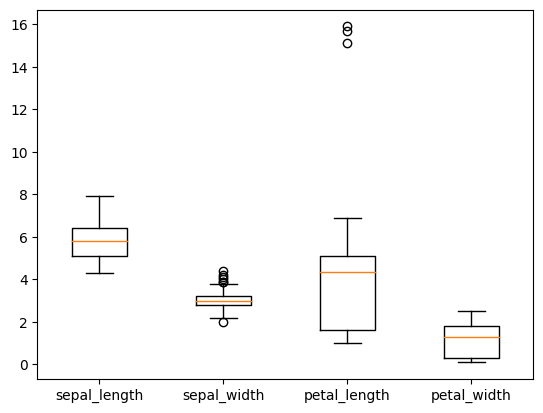

In [12]:
plt.boxplot([df_processed['sepal_length'], df_processed['sepal_width'], df_processed['petal_length'], df_processed['petal_width']])
plt.xticks([1,2,3,4], ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

In [13]:
# petal_length에 이상치가 분포
# 1사분위수보다 1.5 IQR보다 작거나 3사분위수보다 1.5 IQR 큰 수의 Boolean Array를 구한 후 해당하는 데이터를 구한다.
q1, q3 = np.percentile(df_processed['petal_length'], [25,75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outlier_filter = (df_processed['petal_length'] < lower_bound) | (df_processed['petal_length'] > upper_bound)
df_processed[outlier_filter]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,15.1,1.9,virginica
143,6.8,3.2,15.9,2.3,virginica
144,6.7,3.3,15.7,2.5,virginica


In [14]:
# 이상치 제거
df_processed2 = df_processed[~outlier_filter]
df_processed2

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.50,1.4,0.2,setosa
1,4.9,3.05,1.4,0.2,setosa
2,4.7,3.20,1.3,0.2,setosa
3,4.6,3.05,1.5,0.2,setosa
4,5.0,3.60,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.00,5.2,2.3,virginica
146,6.3,2.50,5.0,1.9,virginica
147,6.5,3.00,5.2,2.0,virginica
148,6.2,3.40,5.4,2.3,virginica


In [15]:
# petal_length 데이터 정규화 (z-score)
petal_length_avg = df_processed['petal_length'].mean()
petal_length_std = df_processed['petal_length'].std()
z_score = (df_processed['petal_length'] - petal_length_avg) / petal_length_std

(array([0.5395978 , 0.11871152, 0.64751736, 0.28059085, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.03237587]),
 array([-1.22636707, -0.60862301,  0.00912105,  0.62686511,  1.24460917,
         1.86235323,  2.48009729,  3.09784135,  3.71558541,  4.33332947,
         4.95107353]),
 <BarContainer object of 10 artists>)

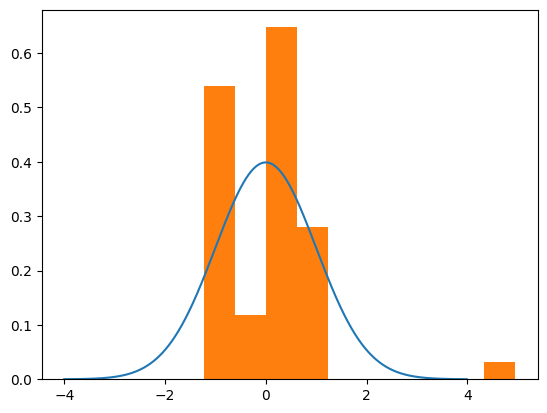

In [16]:
x = np.arange(-4, 4, 0.01)
y = (lambda x: 1/np.sqrt(2*np.pi)/np.exp(x**2/2))(x)
plt.plot(x, y)
plt.hist(z_score, density=True)

In [18]:
outlier_filter2 = (z_score < -3) | (z_score > 3)
df_processed[outlier_filter2]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,15.1,1.9,virginica
143,6.8,3.2,15.9,2.3,virginica
144,6.7,3.3,15.7,2.5,virginica


In [19]:
df_processed2 = df_processed[~outlier_filter2]
len(df_processed2)

147

In [20]:
from sklearn import preprocessing
columns_to_scale = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [21]:
# z 스코어 정규화
df_scaled_standardized = df_processed2.copy()
scaler = preprocessing.StandardScaler()
df_scaled_standardized[columns_to_scale] = scaler.fit_transform(df_processed2[columns_to_scale])
df_scaled_standardized

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.884454,1.057644,-1.320807,-1.300986,setosa
1,-1.126342,0.006357,-1.320807,-1.300986,setosa
2,-1.368230,0.356786,-1.377712,-1.300986,setosa
3,-1.489174,0.006357,-1.263902,-1.300986,setosa
4,-1.005398,1.291264,-1.320807,-1.300986,setosa
...,...,...,...,...,...
145,1.050649,-0.110453,0.841569,1.491882,virginica
146,0.566873,-1.278550,0.727760,0.959907,virginica
147,0.808761,-0.110453,0.841569,1.092901,virginica
148,0.445929,0.824025,0.955379,1.491882,virginica


In [22]:
# Min - Max 정규화
df_scaled_normalized = df_processed2.copy()
scaler = preprocessing.MinMaxScaler()
df_scaled_normalized[columns_to_scale] = scaler.fit_transform(df_processed2[columns_to_scale])
df_scaled_normalized

,sepal_length,sepal_width,petal_length,petal_width,target
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.437500,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.437500,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,virginica
146,0.555556,0.208333,0.677966,0.750000,virginica
147,0.611111,0.416667,0.711864,0.791667,virginica
148,0.527778,0.583333,0.745763,0.916667,virginica


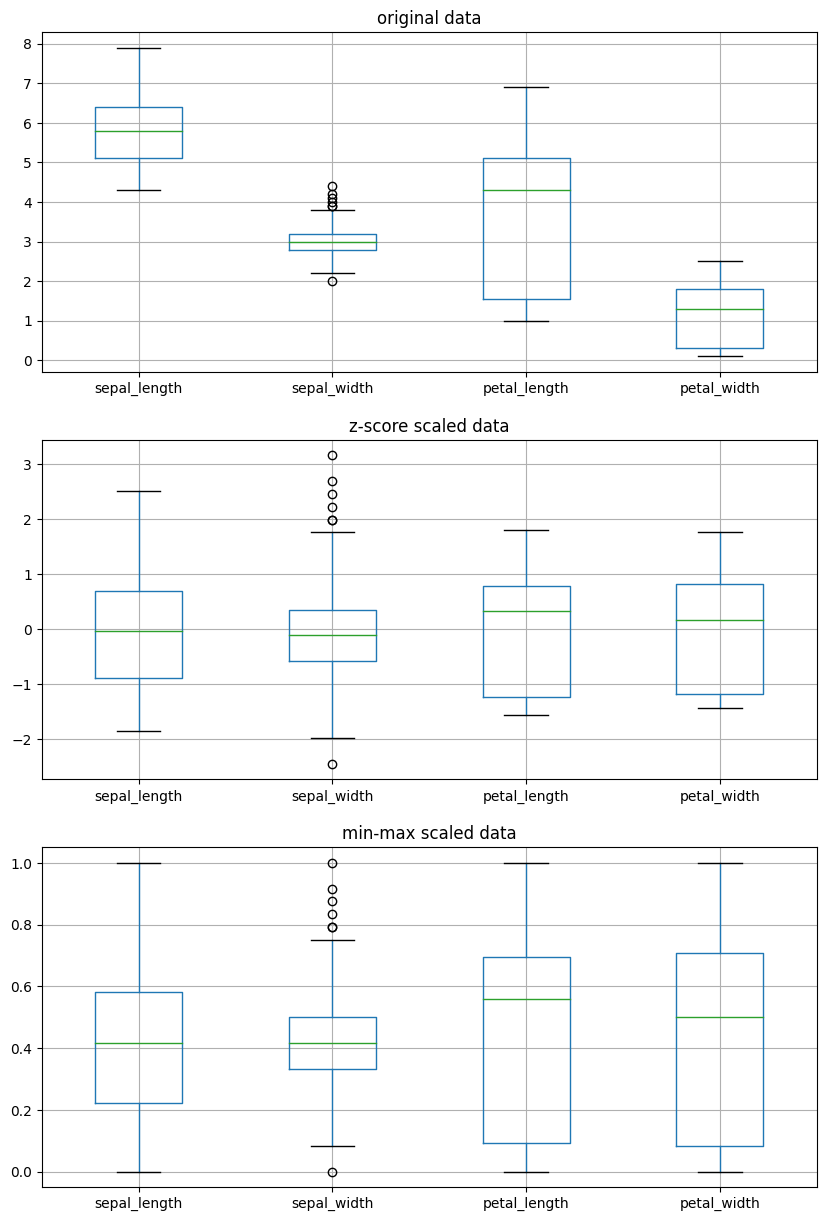

In [23]:
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
df_processed2[columns_to_scale].boxplot()
plt.title('original data')
plt.subplot(3, 1, 2)
df_scaled_standardized[columns_to_scale].boxplot()
plt.title('z-score scaled data')
plt.subplot(3, 1, 3)
df_scaled_normalized[columns_to_scale].boxplot()
plt.title('min-max scaled data')
plt.show()

In [24]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,137.000000,150.000000,150.000000
mean,5.843333,3.047445,3.958000,1.199333
std,0.828066,0.446733,2.412002,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,15.900000,2.500000


In [25]:
df.groupby('target').mean()

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
setosa,5.006,3.440909,1.462,0.246
versicolor,5.936,2.764583,4.260,1.326
virginica,6.588,2.964444,6.152,2.026


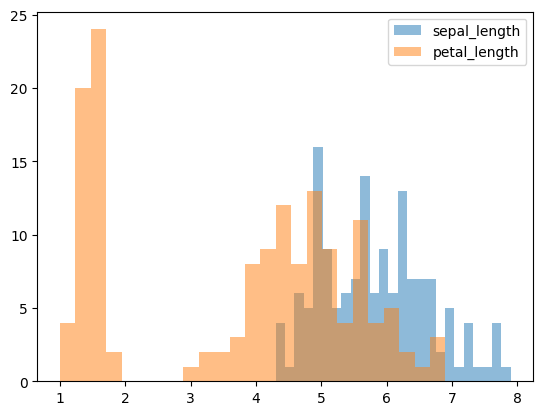

In [26]:
hist1 = df_processed2['sepal_length']
hist2 = df_processed2['petal_length']
plt.hist(hist1, label='sepal_length', alpha=0.5, bins=25)
plt.hist(hist2, label='petal_length', alpha=0.5, bins=25)
plt.legend(loc = 0)
plt.show()

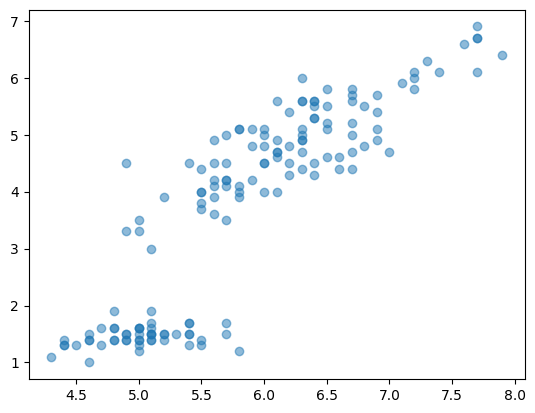

In [27]:
x = df_processed2['sepal_length']
y = df_processed2['petal_length']
plt.scatter(x, y, alpha=0.5)
plt.show()

In [28]:
# 피어슨 상관계수 : 결과값의 절대값이 0.7이 넘으면 상관관계가 있다고 해석할 수 있다.
np.corrcoef(x, y)

array([[1.        , 0.87153436],
       [0.87153436, 1.        ]])